In [4]:
import pandas as pd

In [2]:
def load_google():
    #baidu_path=r"/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/consolidation/baidu_data.csv"
    #/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred
    #baidu_daily=pd.read_csv(baidu_path)
    goog_path=r"/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/0411/goog_trends_0416.csv"
    goog_hourly=pd.read_csv(goog_path)
    #print(goog_hourly.head())
    goog_hourly['Timestamp']=pd.to_datetime(goog_hourly['date'])
    goog_hourly.set_index("Timestamp",inplace=True)
    goog_hourly['bitcoin']=goog_hourly['bitcoin']+1
    
    prev_time=0
    multiplier=1
    prev_trans=1
    timestamp=[]
    bitcoin_trend=[]
    for index, row in goog_hourly.iterrows():
        if row['date']!=prev_time:
            timestamp.append(row['date'])
            curr_level_trans=row['bitcoin']*multiplier
            bitcoin_trend.append(curr_level_trans)
            prev_time=row['date']
            prev_trans=curr_level_trans
        else:
            multiplier=prev_trans/row['bitcoin']
    goog_hourly_trans=pd.DataFrame({'datetime':timestamp, 'bitcoin':bitcoin_trend})
    #goog_hourly_trans['Timestamp']=pd.to_datetime(goog_hourly_trans['datetime']) 
    goog_hourly_trans.['datetime']
    #goog_hourly_trans.set_index("Timestamp",inplace=True)
    return goog_hourly_trans

In [32]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.ewma(dataset['price'], span=26)
    #dataset['12ema'] = pd.ewma(dataset['price'], span=12)
    dataset['26ema'] = dataset['price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['price'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset['price'].rolling(window=7).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum_1'] = dataset['price'].shift(1)
    dataset['momentum_2'] = dataset['price'].shift(2)
    dataset['momentum_3'] = dataset['price'].shift(3)
    dataset['momentum_4'] = dataset['price'].shift(4)
    dataset['momentum_5'] = dataset['price'].shift(5)
    
    #dataset["momentum return"]=dataset['Close']/dataset['momentum']
    dataset["momentum_1 return"]=dataset['price']/dataset['momentum_1']
    dataset["momentum_2 return"]=dataset['price']/dataset['momentum_2']
    dataset["momentum_3 return"]=dataset['price']/dataset['momentum_3']
    dataset["momentum_4 return"]=dataset['price']/dataset['momentum_4']
    dataset["momentum_5 return"]=dataset['price']/dataset['momentum_5']
    
    return dataset

In [33]:
def load_bitcoin():
    bitcoin_path=r"/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/0411/bitcoin_hourly_0410.csv"
    bitcoin_hourly=pd.read_csv(bitcoin_path)
    bitcoin_hourly[bitcoin_hourly['Close'].isnull()]
    bitcoin_hourly.dropna(inplace=True)
    #bitcoin_hourly.set_index("Timestamp",inplace=True)
    bitcoin_hourly.drop(columns=['Volume (BTC)', 'Volume (Currency)'],inplace=True)
    bitcoin_hourly['Open']= pd.to_numeric(bitcoin_hourly['Open'],errors='coerce')
    bitcoin_hourly['High']= pd.to_numeric(bitcoin_hourly['High'],errors='coerce') 
    bitcoin_hourly['Low']= pd.to_numeric(bitcoin_hourly['Low'],errors='coerce') 
    bitcoin_hourly['Close']= pd.to_numeric(bitcoin_hourly['Close'],errors='coerce') 
    bitcoin_hourly['Weighted Price']= pd.to_numeric(bitcoin_hourly['Weighted Price'],errors='coerce') 
    bitcoin_hourly['price']=bitcoin_hourly['Close']
    print()
    bitcoin_hourly.drop(columns=['Close'],inplace=True)
    bitcoin_hourly.reset_index()
    dataset=get_technical_indicators(bitcoin_hourly)
    dataset['Timestamp']=pd.to_datetime(dataset['Timestamp'])
    return dataset

In [76]:
def get_twitter_trends():
    twitter_trends=pd.read_csv("/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/0411/twitter_series_0416.csv")
    twitter_trends['timestamp']=pd.to_datetime(twitter_trends['timestamp']) 
    twitter_trends.set_index("timestamp",inplace=True)
    twitter_trends["fc_1_2"]=twitter_trends["follwers_count"]**(1/2)
    twitter_trends["fc_1_4"]=twitter_trends["follwers_count"]**(1/4)
    twitter_trends["wgtd_polarity_1"]=twitter_trends["follwers_count"]*twitter_trends["polarity"]
    twitter_trends["wgtd_polarity_1_2"]=twitter_trends["fc_1_2"]*twitter_trends["polarity"]
    twitter_trends["wgtd_polarity_1_4"]=twitter_trends["fc_1_4"]*twitter_trends["polarity"]
    twitter_trends["wgtd_sub_1_4"]=twitter_trends["fc_1_4"]*twitter_trends["subjectivity"]
    twitter_trends_hourly = pd.DataFrame()
    twitter_trends_hourly['Hourly Polarity Mean'] = twitter_trends.polarity.resample('h').mean()
    twitter_trends_hourly['Hourly Polarity Weighted Mean 1'] = twitter_trends["wgtd_polarity_1"].resample('h').sum()/twitter_trends["follwers_count"].resample('h').sum()
    twitter_trends_hourly['Hourly Polarity Weighted Mean 1_2'] = twitter_trends["wgtd_polarity_1_2"].resample('h').sum()/twitter_trends["fc_1_2"].resample('h').sum()
    twitter_trends_hourly['Hourly Polarity Weighted Mean 1_4'] = twitter_trends["wgtd_polarity_1_4"].resample('h').sum()/twitter_trends["fc_1_4"].resample('h').sum()
    
    twitter_trends_hourly['Hourly Sub Mean'] = twitter_trends.subjectivity.resample('h').mean()
    twitter_trends_hourly['Hourly Sub Weighted Mean 1_4'] = twitter_trends["wgtd_sub_1_4"].resample('h').sum()/twitter_trends["fc_1_4"].resample('h').sum()
   
    #twitter_trends_hourly.reset_index(inplace=True)
    #twitter_trends_hourly['Timestamp']=pd.to_datetime(twitter_trends_hourly['timestamp'])
    #twitter_trends_hourly.drop(columns=['timestamp'],inplace=True)
    return twitter_trends_hourly.tz_convert(None)

In [5]:
google_hourly=load_google()

In [74]:
twitter_trends=pd.read_csv("/Users/ziyunchebn/Desktop/Big Data Analytics/bitcoin_pred/0411/twitter_series_0416.csv")

In [6]:
google_hourly

,datetime,bitcoin,Timestamp
0,2020-02-01 00:00:00,73.000000,2020-02-01 00:00:00
1,2020-02-01 01:00:00,67.000000,2020-02-01 01:00:00
2,2020-02-01 02:00:00,66.000000,2020-02-01 02:00:00
3,2020-02-01 03:00:00,65.000000,2020-02-01 03:00:00
4,2020-02-01 04:00:00,61.000000,2020-02-01 04:00:00
...,...,...,...
1629,2020-04-15 20:00:00,2.726811,2020-04-15 20:00:00
1630,2020-04-15 21:00:00,2.756451,2020-04-15 21:00:00
1631,2020-04-15 22:00:00,2.963925,2020-04-15 22:00:00
1632,2020-04-15 23:00:00,2.756451,2020-04-15 23:00:00


In [36]:
bitcoin_hourly=load_bitcoin()

In [37]:
dataset_search_hourly=bitcoin_hourly.merge(google_hourly,left_on='Timestamp', right_on='Timestamp')

In [38]:
dataset_search_hourly.set_index("Timestamp",inplace=True)

In [50]:
dataset_search_hourly.to_csv("dataset_search_hourly_0416.csv")

In [ ]:
dataset_search_hourly

In [77]:
twitter_trends_hourly=get_twitter_trends()

In [78]:
twitter_trends_hourly

,Hourly Polarity Mean,Hourly Polarity Weighted Mean 1,Hourly Polarity Weighted Mean 1_2,Hourly Polarity Weighted Mean 1_4,Hourly Sub Mean,Hourly Sub Weighted Mean 1_4
timestamp,,,,,,
2020-02-09 08:00:00,0.077215,0.177412,0.133830,0.100191,0.219141,0.216313
2020-02-09 09:00:00,0.092508,0.119865,0.109187,0.100144,0.270329,0.266471
2020-02-09 10:00:00,0.136894,0.143959,0.142654,0.138648,0.330352,0.341669
2020-02-09 11:00:00,0.118374,0.093255,0.113416,0.118824,0.321849,0.312297
2020-02-09 12:00:00,0.127048,0.075334,0.110792,0.119858,0.294620,0.287801
...,...,...,...,...,...,...
2020-04-16 00:00:00,0.104746,0.113695,0.133561,0.119776,0.296428,0.302358
2020-04-16 01:00:00,0.093476,0.094227,0.085303,0.083091,0.328467,0.306337
2020-04-16 02:00:00,0.130010,0.143508,0.161083,0.146715,0.367071,0.387965


In [79]:
dataset_consolidated=pd.concat([dataset_search_hourly, twitter_trends_hourly], axis=1,sort=False)

In [80]:
dataset_consolidated

,Open,High,Low,Weighted Price,price,ma7,ma21,26ema,12ema,MACD,...,momentum_4 return,momentum_5 return,datetime,bitcoin,Hourly Polarity Mean,Hourly Polarity Weighted Mean 1,Hourly Polarity Weighted Mean 1_2,Hourly Polarity Weighted Mean 1_4,Hourly Sub Mean,Hourly Sub Weighted Mean 1_4
2020-02-01 00:00:00,9337.1,9376.3,9336.0,9355.76,9372.0,9334.100000,9319.061905,9338.414300,9331.897840,-6.516460,...,1.007374,1.009413,2020-02-01 00:00:00,73.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 01:00:00,9372.1,9418.0,9372.0,9396.57,9417.9,9351.100000,9320.085714,9344.302130,9345.128942,0.826812,...,1.007208,1.012307,2020-02-01 01:00:00,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 02:00:00,9418.0,9453.9,9396.3,9427.90,9425.9,9371.285714,9324.890476,9350.346416,9357.555258,7.208842,...,1.003823,1.008064,2020-02-01 02:00:00,66.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 03:00:00,9437.7,9447.7,9395.8,9412.27,9417.6,9387.600000,9328.014286,9355.328163,9366.792911,11.464748,...,1.008384,1.002939,2020-02-01 03:00:00,65.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01 04:00:00,9417.6,9441.9,9391.9,9420.98,9391.9,9393.514286,9330.295238,9358.037188,9370.655540,12.618352,...,1.002123,1.005632,2020-02-01 04:00:00,61.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 00:00:00,6618.1,6618.8,6478.6,6542.26,6579.1,6699.114286,6767.261905,6762.783889,6708.852825,-53.931064,...,0.974537,0.977026,2020-04-16 00:00:00,2.845368,0.104746,0.113695,0.133561,0.119776,0.296428,0.302358
2020-04-16 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.093476,0.094227,0.085303,0.083091,0.328467,0.306337
2020-04-16 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.130010,0.143508,0.161083,0.146715,0.367071,0.387965
2020-04-16 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.081475,0.101235,0.085270,0.080011,0.214827,0.210562


In [41]:
dataset_consolidated.reset_index(inplace=True,drop=True)

In [48]:
dataset_consolidated.tail(100)

,Open,High,Low,Weighted Price,price,ma7,ma21,26ema,12ema,MACD,...,momentum_2 return,momentum_3 return,momentum_4 return,momentum_5 return,datetime,bitcoin,Hourly Polarity Mean,Hourly Polarity Weighted Mean 1,Hourly Polarity Weighted Mean 1_2,Hourly Polarity Weighted Mean 1_4
2020-04-12 01:00:00,6873.6,6885.2,6852.1,6868.72,6854.4,6853.342857,6862.119048,6877.899614,6856.980105,-20.919509,...,0.994891,0.997758,0.996699,1.008742,2020-04-12 01:00:00,2.104387,0.139326,0.099510,0.118121,0.128810
2020-04-12 02:00:00,6856.1,6856.1,6811.0,6826.25,6831.4,6855.971429,6856.957143,6874.455198,6853.044705,-21.410494,...,0.993730,0.991552,0.994410,0.993355,2020-04-12 02:00:00,2.134026,0.092642,0.171075,0.107133,0.090683
2020-04-12 03:00:00,6831.4,6837.3,6820.0,6829.07,6822.5,6859.900000,6851.580952,6870.606665,6848.345519,-22.261146,...,0.995346,0.992436,0.990261,0.993115,2020-04-12 03:00:00,2.045109,0.135622,0.100444,0.118987,0.125778
2020-04-12 04:00:00,6821.4,6830.0,6795.0,6810.09,6829.2,6853.057143,6848.704762,6867.539505,6845.400055,-22.139450,...,0.999678,0.996324,0.993410,0.991233,2020-04-12 04:00:00,2.015469,0.130000,0.090264,0.106198,0.116962
2020-04-12 05:00:00,6829.3,6851.1,6819.4,6833.22,6840.7,6848.900000,6846.390476,6865.551393,6844.676969,-20.874424,...,1.002668,1.001361,0.998001,0.995083,2020-04-12 05:00:00,2.193305,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-16 00:00:00,6618.1,6618.8,6478.6,6542.26,6579.1,6699.114286,6767.261905,6762.783889,6708.852825,-53.931064,...,0.979747,0.976852,0.974537,0.977026,2020-04-16 00:00:00,2.845368,0.104746,0.113695,0.133561,0.119776
2020-04-16 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.093476,0.094227,0.085303,0.083091
2020-04-16 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.130010,0.143508,0.161083,0.146715
2020-04-16 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.081475,0.101235,0.085270,0.080011


In [49]:
dataset_consolidated.to_csv("dataset_search_sentiment.csv")

In [85]:
dataset_consolidated.dropna(inplace=True)

In [51]:
import scipy.stats

In [53]:
result = scipy.stats.linregress(dataset_consolidated.price, dataset_consolidated.bitcoin)

In [54]:
result

LinregressResult(slope=-0.004792422551990888, intercept=111.11267626298421, rvalue=-0.1694005222647604, pvalue=1.9985072140653865e-07, stderr=0.0009147659061534638)

In [55]:
result_hourly_polarity = scipy.stats.linregress(dataset_consolidated.price, dataset_consolidated['Hourly Polarity Mean'])

In [56]:
result_hourly_polarity

LinregressResult(slope=2.1343298026584794e-07, intercept=0.10466358529675902, rvalue=0.009815273604389246, pvalue=0.7648703439610234, stderr=7.13395458988955e-07)

In [57]:
result_hourly_polarity_wm = scipy.stats.linregress(dataset_consolidated.price, dataset_consolidated['Hourly Polarity Weighted Mean 1_2'])

In [58]:
result_hourly_polarity_wm

LinregressResult(slope=2.0866693453271741e-07, intercept=0.10066001882381054, rvalue=0.008396208720666258, pvalue=0.7980682810846309, stderr=8.153559489895032e-07)

In [66]:
dataset_display=dataset_consolidated[['price','bitcoin','Hourly Polarity Mean','Hourly Polarity Weighted Mean 1_4']]

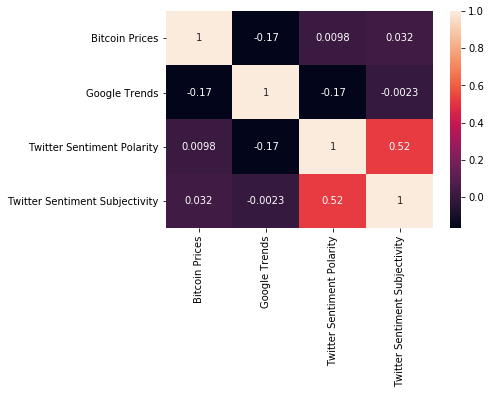

In [91]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

'''
data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

df = pd.DataFrame(data,columns=['A','B','C'])
'''
corrMatrix = data_show.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [63]:
plt.show()

In [65]:
corrMatrix

,price,bitcoin,Hourly Polarity Weighted Mean 1_4
price,1.000000,-0.169401,0.012994
bitcoin,-0.169401,1.000000,-0.145261
Hourly Polarity Weighted Mean 1_4,0.012994,-0.145261,1.000000


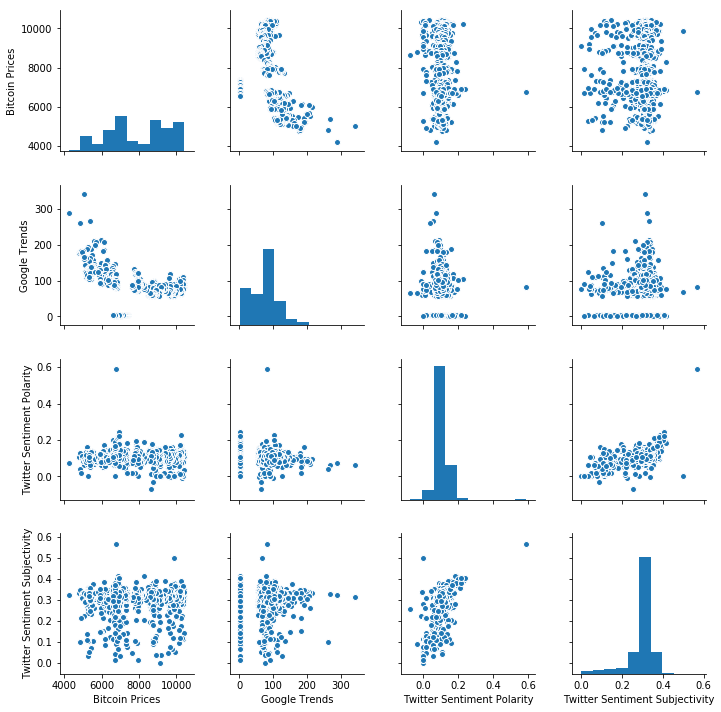

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
data_show=dataset_consolidated[['price','bitcoin','Hourly Polarity Mean','Hourly Sub Mean']]
data_show.columns=['Bitcoin Prices',"Google Trends",'Twitter Sentiment Polarity','Twitter Sentiment Subjectivity']
# Basic correlogram
sns_plot=sns.pairplot(data_show)

In [90]:
sns_plot.savefig('correlations.png')

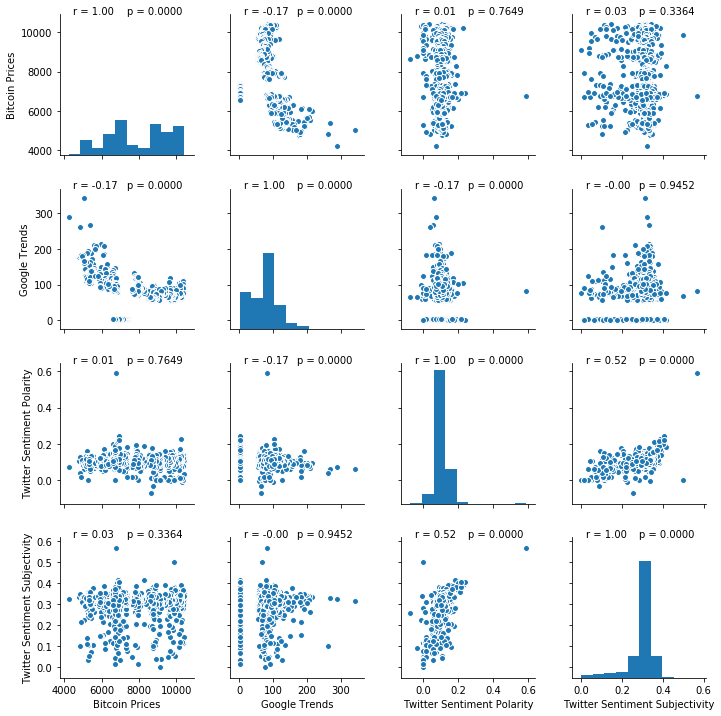

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, 1), xycoords=ax.transAxes)
    ax.annotate("p = {:.4f}".format(p),
                xy=(.5, 1), xycoords=ax.transAxes)

graph = sns.pairplot(data_show)
graph.map(corrfunc)
plt.show()

In [96]:
graph.savefig('correlations_stats.png')